**About Dataset**

**Content**

You have some basic data about your customers like:

*   Customer ID
*   Age
*   Gender
*   Annual Income
*   Spending Score

Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

customer-segmentation-tutorial-in-python.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/customer-segmentation-tutorial-in-python.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from plotly import express as px
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import homogeneity_score
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('bmh')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Path = '/content/Mall_Customers.csv'
customers_data = pd.read_csv(Path)

In [ ]:
customers_data.sample(n=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
12,13,Female,58,20,15
175,176,Female,30,88,86
114,115,Female,18,65,48
35,36,Female,21,33,81
30,31,Male,60,30,4
29,30,Female,23,29,87
130,131,Male,47,71,9
177,178,Male,27,88,69
137,138,Male,32,73,73
144,145,Male,25,77,12


In [ ]:
# Check shape of data
print('Number of Columns in data is = {Col}'.format(Col=customers_data.shape[1]))
print('Number of Rows in data is = {Row}'.format(Row=customers_data.shape[0]))

Number of Columns in data is = 5
Number of Rows in data is = 200


In [ ]:
# Check name of columns in data
cols_name = Customers_data.columns
print('Name of Columns is ')
print(pd.Series(cols_name))

Name of Columns is 
0                CustomerID
1                    Gender
2                       Age
3        Annual Income (k$)
4    Spending Score (1-100)
dtype: object


In [ ]:
# Check more information about the data
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Check data type for each column
customers_data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
# Check missing data
customers_data.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
customers_data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Check duplicated rows in the data
customers_data.duplicated().any()

False

In [ ]:
# Drop unimportant columns
customers_data.drop(columns=['CustomerID'], axis=1, inplace=True)

In [ ]:
# Summary Statistics
customers_data.describe().round(3)

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000,200.000,200.000
mean,38.850,60.560,50.200
std,13.969,26.265,25.824
min,18.000,15.000,1.000
25%,28.750,41.500,34.750
50%,36.000,61.500,50.000
75%,49.000,78.000,73.000
max,70.000,137.000,99.000


In [ ]:
customers_data.describe(include='object').T

,count,unique,top,freq
Gender,200,2,Female,112


In [ ]:
customers_data.groupby('Gender')['Age'].max()

Gender
Female    68
Male      70
Name: Age, dtype: int64

**EDA**

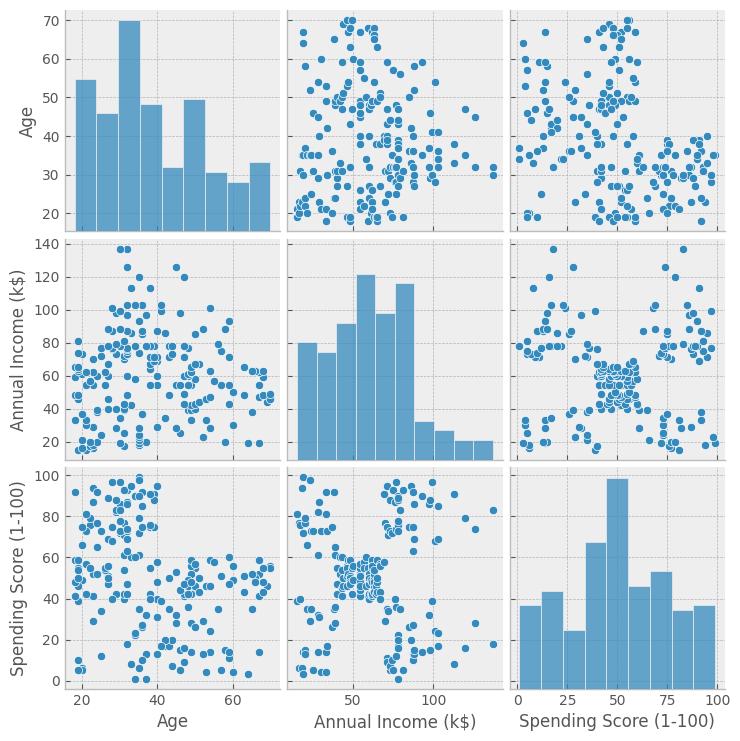

In [ ]:
sns.pairplot(customers_data)

In [ ]:
plt.figure(figsize=(0.1,0.1))
fig = px.histogram(customers_data, x='Gender', color='Gender', barmode='group')
fig.show()

<Figure size 10x10 with 0 Axes>

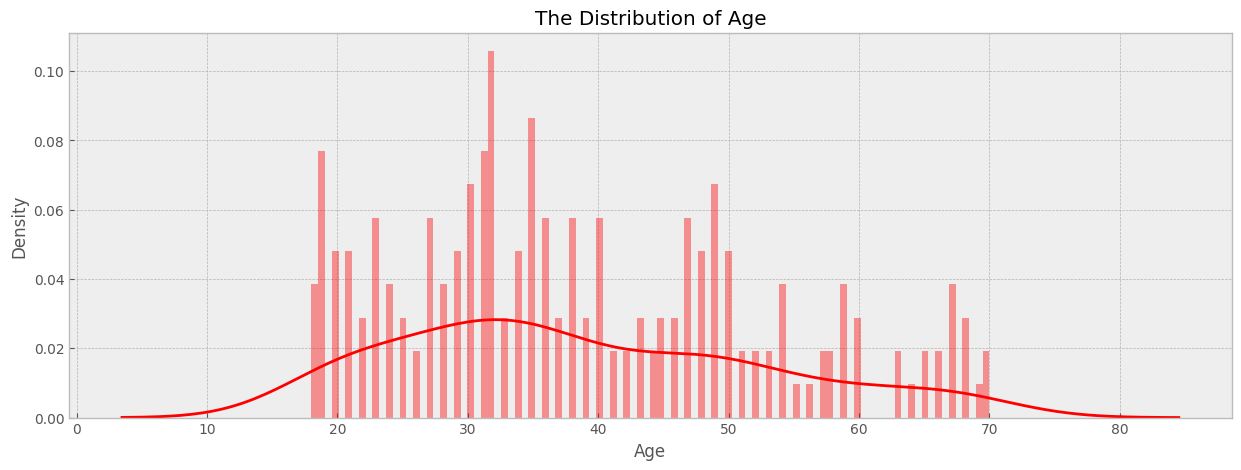

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(customers_data['Age'],color='red',bins=100,kde=True)
plt.title('The Distribution of Age')
plt.show()

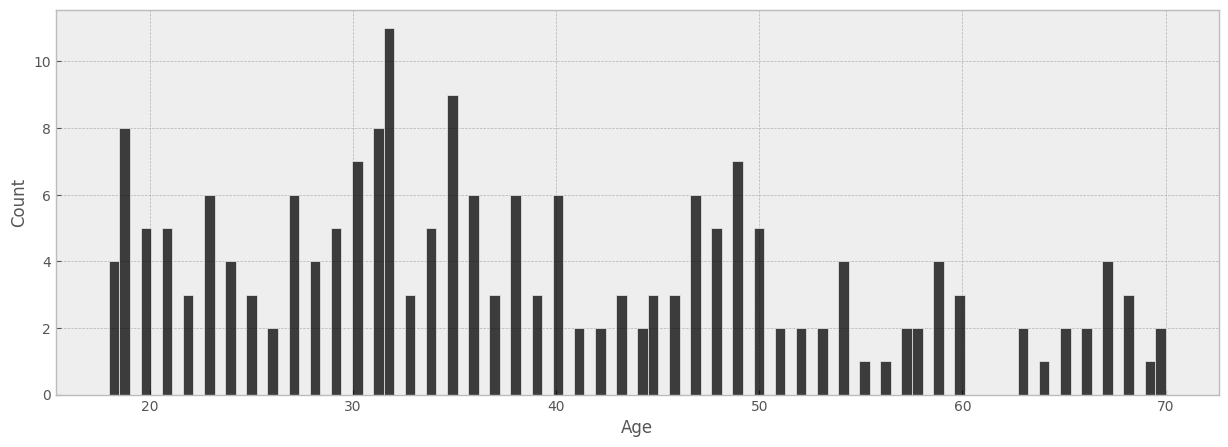

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(customers_data['Age'],color='black',bins=100)
plt.show()

In [ ]:
numerical_data = customers_data.select_dtypes(exclude='object')

In [ ]:
fig = px.box(numerical_data, orientation='v', title='Box Plot for All Columns')
fig.show()

<Axes: >

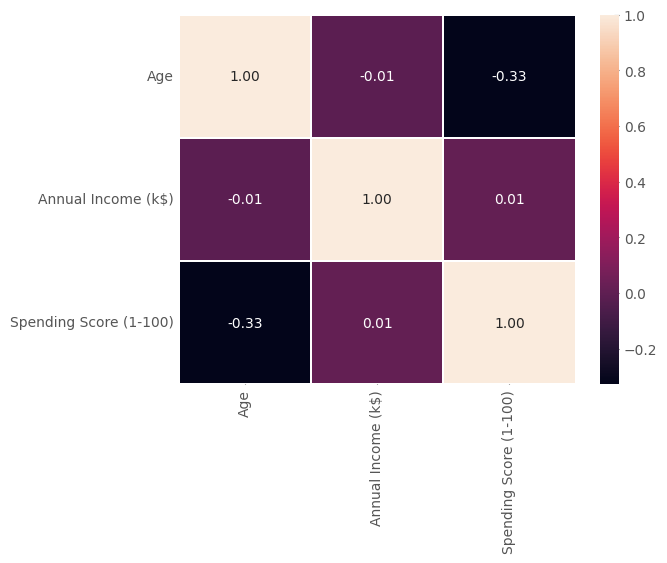

In [ ]:
corr = customers_data.corr()
sns.heatmap(corr , annot=True , linewidth=0.3, fmt='.2f')

In [ ]:
data=customers_data.iloc[:,2:4].values
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100,n_init = 10 ,max_iter=200,tol=0.0001)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

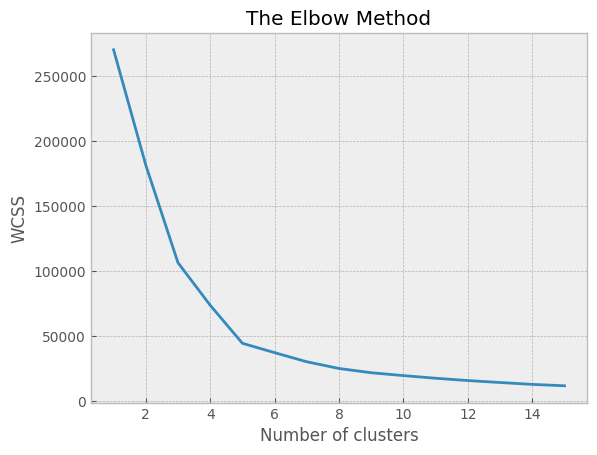

In [ ]:
plt.plot(range(1, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
model = KMeans(n_clusters=5)

In [ ]:
model.fit(data)

KMeans(n_clusters=5)

In [ ]:
labels=model.predict(data)
C=model.cluster_centers_

In [ ]:
customers_data['Cluster'] = labels

In [ ]:
customers_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [ ]:
customers_data.Cluster.value_counts()

1    81
2    39
0    35
4    23
3    22
Name: Cluster, dtype: int64

In [ ]:
customers_data.groupby("Cluster").agg({"Age":"mean", "Annual Income (k$)":"median", "Spending Score (1-100)":"median"}).round()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,41.0,85.0,16.0
1,43.0,54.0,50.0
2,33.0,79.0,83.0
3,25.0,24.0,77.0
4,45.0,25.0,17.0


In [ ]:
y_pred = model.predict(data)
#Adjusted Rand Index
adjusted_rand_score(labels, y_pred)

1.0

In [ ]:
#Homogeneity
homogeneity_score(labels, y_pred)

1.0

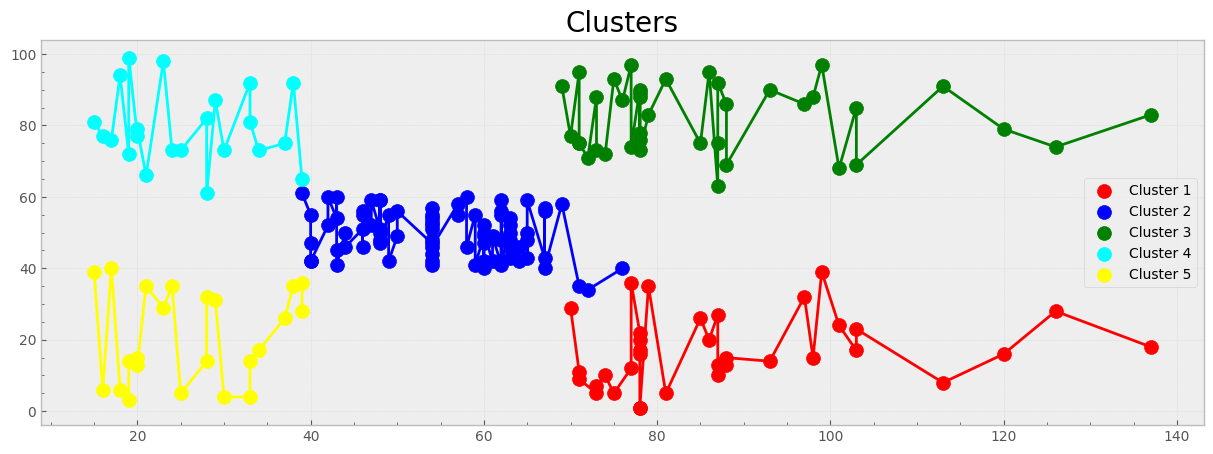

In [ ]:
X=data
plt.figure(figsize=(15,5))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.plot(X[labels == 0, 0], X[labels == 0, 1],  c = 'red', label = '')

plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.plot(X[labels == 1, 0], X[labels == 1, 1],  c = 'blue', label = '')

plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.plot(X[labels == 2, 0], X[labels == 2, 1],  c = 'green', label = '')

plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.plot(X[labels == 3, 0], X[labels == 3, 1],  c = 'cyan', label = '')

plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')
plt.plot(X[labels == 4, 0], X[labels == 4, 1],  c = 'yellow', label = '')

plt.grid(True,alpha=0.3,linewidth=0.4,which='major')
plt.title('Clusters',fontsize=20)
plt.legend()
plt.minorticks_on()
plt.show()

In [ ]:
import pickle
filename = 'my_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)